<a href="https://colab.research.google.com/github/SergeiSa/Control-Theory-Slides-Spring-2021/blob/main/ColabNotebooks/practice_11_controllability_observability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practice 11: Controllability**

---

## **Motivation**

**Controllability** is an important property of a control system, and the controllability property plays a crucial role in many control problems, such as stabilization of unstable systems by feedback, or optimal control.

Roughly, the concept of controllability denotes the **ability to move a system around in its entire configuration space using only certain admissible manipulations**. The exact definition varies slightly within the framework or the type of models applied.

We can informally define controllability as follows: 

If for some initial state $\mathbf {x_{0}}$  and some final state $\mathbf {x_{f}}$ there exists an input sequence to transfer the system state from $\mathbf {x_{0}}$  to $\mathbf {x_{f}}$ in a finite time interval, then the system modeled by the state-space representation is controllable.

For the controllable system we can **place the poles at arbitary desired location** on the complex plane


### **Full State Controlability (Kalman)**
Consider the descrete or continues time systems:
\begin{equation}
\dot{\mathbf{x}}
=
\mathbf{A}\mathbf{x}
+ 
\mathbf{B}\mathbf{u}
\\
\mathbf{x}_{k+1}
=
\mathbf{A}_d\mathbf{x}_k
+ 
\mathbf{B}_d\mathbf{u}_k
\end{equation}
The $n\times nm$ controllability matrix is given by

\begin{equation}
\mathcal{\mathbf{R}}=
{\begin{bmatrix}
\mathbf{B}&
\mathbf{AB}&
\mathbf{A^{{2}}B}&
...&
\mathbf{A^{{n-1}}B}
\end{bmatrix}}
\end{equation}
The system is **full state controllable** iff the controllability matrix has full row rank:
\begin{equation}
\text{rank}\{\mathcal{\mathbf{R}}\}
=n
\end{equation}


In [ ]:
import numpy as np

def ctrb(A, B):
  R = B
  n = np.shape(A)[0]
  # print(n)
  for i in range(1,n):
    A_pwr_n = np.linalg.matrix_power(A, i) 
    R = np.hstack((R,A_pwr_n.dot(B)))
  rank_R = np.linalg.matrix_rank(R)
  
  if rank_R == n:
    test = 'controllable'
  else:
    test = 'uncontrollable'
  return R, rank_R, test

A = [[0,1],
     [-2,-3]]
A = np.array(A)

B = [[0],
     [1]]
     
B = np.array(B)

R, rank, test = ctrb(A, B)
print(f'Contralability matrix:\n{R}\n\nRank of the controlability matrix: {rank},\nsystem is {test}' )

Contralability matrix:
[[ 0  1]
 [ 1 -3]]

Rank of the controlability matrix: 2,
system is controllable


In [ ]:
M, m, l, b, g = 2, .2, 0.2, 0.1, 9.81

A = [[0, 1, 0, 0], 
     [g*(M+m)/(M*l), 0 , 0, 0],
     [0,0,0,1],
     [-m*g/M, 0, 0,0]]
     
A = np.array(A)

B = [[0], 
     [-1/(M*l)], 
     [0], 
     [1/M]]

B = np.array(B)

R, rank, test = ctrb(A, B)
print(f'Contralability matrix:\n{R}\n\nRank of the controlability matrix: {rank},\nsystem is {test}' )

Contralability matrix:
[[   0.       -2.5       0.     -134.8875]
 [  -2.5       0.     -134.8875    0.    ]
 [   0.        0.5       0.        2.4525]
 [   0.5       0.        2.4525    0.    ]]

Rank of the controlability matrix: 4,
system is controllable


### **Popov-Belevitch-Hautus test**

The pair $\{ \mathbf{A}, \mathbf{B}\}$is said to be controllable iff:

\begin{equation}
\text{rank}\{ 
\begin{bmatrix}
\mathbf{A} - \zeta \mathbf{I}
&
\mathbf{B}
\end{bmatrix}
  \} =n, \quad
  \forall \zeta \in 
  \mathbb{C}
\end{equation}

However the only way for $\mathbf{A} - \lambda\mathbf{I}$ to lose the rank is for $\lambda$ to be the eigenvalue of $\mathbf{A}$, thus instead of checking the entire complex plane we may consider just the eigenvalues:

\begin{equation}
\text{rank}\{ 
\begin{bmatrix}
\mathbf{A} - \lambda_i \mathbf{I}
&
\mathbf{B}
\end{bmatrix}
  \} =n, \quad
  \forall i \in 
  \{1, 2,\dots, n\}
\end{equation}



In [ ]:
def pbh(A, B):
    lambdas, v = np.linalg.eig(A)
    n = np.shape(A)[0]
    ranks = n*[0]
    test = 'controllable'
    for i in range(n):
      A_e = A - lambdas[i]*np.eye(n)
      M = np.hstack((A_e, B))
      ranks[i] = np.linalg.matrix_rank(M)
      if ranks[i] != n:
        test = 'uncontrollable'
    return lambdas, ranks , test


eigs, ranks, test = pbh(A,B)
print(f'Eigen values of PBH matrices:\n{eigs}\n\nRanks of the PBH matrices: {ranks},\nsystem is {test}' )


Eigen values of PBH matrices:
[ 0.          0.          7.34540673 -7.34540673]

Ranks of the PBH matrices: [4, 4, 4, 4],
system is controllable



it is interesting to see that:
\begin{equation}
\mathbf{B}
\notin
\mathcal{C}(\mathbf{A} - \lambda_i \mathbf{I})
\quad
\forall i \in 
\{1, 2,\dots, n\}
\end{equation}

The matrix $\mathbf{B}$ better to not be aligned with **some of the eigenvectors** 

In [ ]:
from scipy.linalg import null_space, orth
# scipy.linalg.orth(A)
A = [[1,2,3],
     [2,1,0],
     [0,2,4]]

A = np.array(A)
lambdas, v = np.linalg.eig(A)
print(v)
B = [v[:,0]+v[:,1]]
B = [[0],[0],[1]]
B = np.array(B)

R, rank, test = ctrb(A, B)
print(f'Contralability matrix:\n{R}\n\nRank of the controlability matrix: {rank},\nsystem is {test}' )

eigs, ranks, test = pbh(A,B)
print(f'Eigen values of PBH matrices:\n{eigs}\n\nRanks of the PBH matrices: {ranks},\nsystem is {test}' )


[[ 4.08248290e-01 -8.46641303e-16  6.66666667e-01]
 [-8.16496581e-01  8.32050294e-01  3.33333333e-01]
 [ 4.08248290e-01 -5.54700196e-01  6.66666667e-01]]
Contralability matrix:
[[ 0  3 15]
 [ 0  0  6]
 [ 1  4 16]]

Rank of the controlability matrix: 3,
system is controllable
Eigen values of PBH matrices:
[4.4408921e-16 1.0000000e+00 5.0000000e+00]

Ranks of the PBH matrices: [3, 3, 3],
system is controllable


Moreover condition above provide the insight on the **minimal number of the control channels** that we need for sytem to be controllable and is directly related to the multiplicity of the eigenvalues



In [ ]:
m = 1
k1 = 3
k2 = 3
A = [[0,1,0,0],
     [-k1/m,0,0,0],
     [0,0,0, 1],
     [0,0,-k2/m,0]]
A = np.array(A)
B = [[0],[1/m],[0],[1/m]]

B = [[0,0],[1/m,0],[0,0],[0,1/m]]
B = np.array(B)
lambdas, v = np.linalg.eig(A)

eigs, ranks, test = pbh(A,B)
print(f'Eigen values of PBH matrices:\n{eigs}\n\nRanks of the PBH matrices: {ranks},\nsystem is {test}' )


print(lambdas)

Eigen values of PBH matrices:
[0.+1.73205081j 0.-1.73205081j 0.+1.73205081j 0.-1.73205081j]

Ranks of the PBH matrices: [4, 4, 4, 4],
system is controllable
[0.+1.73205081j 0.-1.73205081j 0.+1.73205081j 0.-1.73205081j]


It is clear that **multiplicity $\gamma$ of the eigenvalues** is 2.

In [ ]:
  n = len(lambdas)

  for i in range(n):
    A_e = A - lambdas[i]*np.eye(n)
    print(f'Eigenvalue s: {lambdas[i]}')
    print(f'Rank of A - sI: {np.linalg.matrix_rank(A_e)}')
    print(f'Rank difficiency: {n - np.linalg.matrix_rank(A_e)}\n')

Eigenvalue s: 1.7320508075688772j
Rank of A - sI: 2
Rank difficiency: 2

Eigenvalue s: -1.7320508075688772j
Rank of A - sI: 2
Rank difficiency: 2

Eigenvalue s: 1.7320508075688772j
Rank of A - sI: 2
Rank difficiency: 2

Eigenvalue s: -1.7320508075688772j
Rank of A - sI: 2
Rank difficiency: 2



thus we need at least $m = n - \gamma$ control channels to control the system

In [ ]:
A = [[0,1,0,0],
     [0,0,1,0],
     [0,0,0,1],
     [-2,1,-3,4]]
A = np.array(A)

lambdas, v = np.linalg.eig(A)

n = len(lambdas)
for i in range(n):
  A_e = A - lambdas[i]*np.eye(n)
  print(f'Eigenvalue s: {lambdas[i]}')
  print(f'Rank of A - sI: {np.linalg.matrix_rank(A_e)}')
  print(f'Rank difficiency: {n - np.linalg.matrix_rank(A_e)}\n')

B = [[0],[0],[0],[1]]
B = np.array(B)
eigs, ranks, test = pbh(A,B)
print(f'Eigen values of PBH matrices:\n{eigs}\n\nRanks of the PBH matrices: {ranks},\nsystem is {test}' )


Eigenvalue s: (3.0550069569440637+0j)
Rank of A - sI: 3
Rank difficiency: 1

Eigenvalue s: (1.2648353428932393+0j)
Rank of A - sI: 3
Rank difficiency: 1

Eigenvalue s: (-0.15992114991865097+0.7014362052215042j)
Rank of A - sI: 3
Rank difficiency: 1

Eigenvalue s: (-0.15992114991865097-0.7014362052215042j)
Rank of A - sI: 3
Rank difficiency: 1

Eigen values of PBH matrices:
[ 3.05500696+0.j          1.26483534+0.j         -0.15992115+0.70143621j
 -0.15992115-0.70143621j]

Ranks of the PBH matrices: [4, 4, 4, 4],
system is controllable


### **Degrees of Controlability**

A Kalman test given above is indeed usefull while providing the binary answer to the question does the system is controllable or not. However it may be the case that system is barely controllable, so system may pass controlability test but in practice may not be controllable or designed controller **provide poor performance/not implemntable gains**.

In [ ]:
from scipy.signal import place_poles
m = 1
k1 = 3
k2 = 3
A = [[0,1,0,0],
     [-k1/m,0,0,0],
     [0,0,0, 1],
     [0,0,-k2/m,0]]
A = np.array(A)

B = [[0, 0 ],
     [1/m, 0 ], 
     [0, 0], 
     [ 0,1/m]]

B = np.array(B)

eigs, ranks, test = pbh(A,B)
print(f'Eigen values of PBH matrices:\n{eigs}\n\nRanks of the PBH matrices: {ranks},\nsystem is {test}' )

P = np.array([-1,-2,-3,-4])
pp = place_poles(A, B, P)
K = pp.gain_matrix
print(K)

Eigen values of PBH matrices:
[0.+1.73205081j 0.-1.73205081j 0.+1.73205081j 0.-1.73205081j]

Ranks of the PBH matrices: [4, 4, 4, 4],
system is controllable
[[4.72093174 5.88837381 1.14781568 0.45912492]
 [1.14779945 0.45911681 0.27906826 4.11162619]]


### **Stabilizability**

A slightly weaker notion than controllability is that of stabilizability. A system is said to be stabilizable when all uncontrollable state variables can be made to have stable dynamics. Thus, even though some of the state variables **cannot be controlled** (as determined by the controllability test above) all the state variables will still remain **bounded during** the system's behavior.

**Stabilizable** systems should be controllable only for the unstable eigenvalues i.e:

\begin{equation}
\text{rank}\{ 
\begin{bmatrix}
\mathbf{A} - \lambda_i \mathbf{I}
&
\mathbf{B}
\end{bmatrix}
  \} =n, \quad
  \forall \lambda \in \{c: \text{Re}(c)\geq0\}
\end{equation}

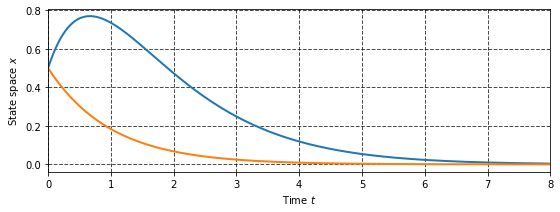

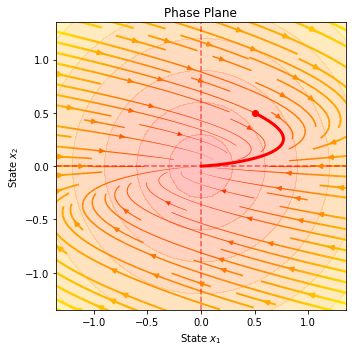

In [ ]:
from scipy.integrate import odeint 
from matplotlib.pyplot import *


A = [[1,1],
     [0,-1]]
A = np.array(A)

B = [[1],
     [0]]
B = np.array(B)

def f(x, t, A, B):
    x_1, x_2 = x
    
    u = -2*x_1 +2*x_2
    # u = 0
    dx_1 = A[0,0]*x_1 + A[0,1]*x_2 + B[0,0]*u
    dx_2 = A[1,0]*x_1 + A[1,1]*x_2 + B[1,0]*u

    return dx_1, dx_2

t0 = 0 # Initial time 
tf = 8 # Final time
t = np.linspace(t0, tf, 1000)

x0 = [0.5,0.5]  # initial state

solution = {"ss": odeint(f, x0, t, args = (A, B))}
x1, x2 = solution['ss'][:,0], solution['ss'][:,1]




figure(figsize=(9, 3))
plot(t, solution['ss'], linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'State space ${x}$')
xlabel(r'Time $t$')
show()


x1_max, x2_max = 1.5, 1.5
x1_span = np.arange(-x1_max,x2_max,0.1)
x2_span = np.arange(-x1_max,x2_max,0.1)
x1_grid, x2_grid = np.meshgrid(x1_span, x2_span)

figure(figsize=(5, 5))
title('Phase Plane')
# Varying color along a streamline
L = (x1_grid**2 + x2_grid**2)**0.5
lw = 3*L / L.max()
contourf(x1_span, x2_span, L, cmap='autumn', alpha = 0.25)

dx1, dx2 = f([x1_grid, x2_grid],t, A, B)

strm = streamplot(x1_span, x2_span, dx1, dx2, density = 1,color=L, cmap='autumn', linewidth = lw)
seed_points = np.array([x0[0], x0[1]])


plot(x1, x2, 'r-', lw = 3.0)
plot(seed_points[0], seed_points[1], 'ro', lw = 10)
hlines(0, -x1_max, x2_max,color = 'red', linestyle = '--', alpha = 0.6)
vlines(0, -x1_max, x2_max,color = 'red', linestyle = '--', alpha = 0.6)
xlim([-0.9*x1_max,0.9*x2_max])
ylim([-0.9*x2_max,0.9*x2_max])
xlabel(r'State ${x}_1$')
ylabel(r'State ${x}_2$')
tight_layout()
show()

In [ ]:

R, rank, test = ctrb(A, B)
print(f'Contralability matrix:\n{R}\n\nRank of the controlability matrix: {rank},\nsystem is {test}' )


Contralability matrix:
[[1 1]
 [0 0]]

Rank of the controlability matrix: 1,
system is uncontrollable


Let's run the slightly modifed PBH test on this system:

In [ ]:
def pbh(A, B):
    lambdas, v = np.linalg.eig(A)
    n = np.shape(A)[0]
    ranks = n*[0]
    # M = n*[0]
    test = 'controllable'
    for i in range(n):
      M = np.hstack((A - lambdas[i]*np.eye(n), B))
      ranks[i] = np.linalg.matrix_rank(M)
      if ranks[i] != n:
        test = 'uncontrollable'
        if np.real(lambdas[i])<0:
          test += ' but stabilizable'
    return ranks, lambdas, test


eigs, ranks, test = pbh(A,B)
print(f'Eigen values of PBH matrices:\n{eigs}\n\nRanks of the PBH matrices: {ranks},\nsystem is {test}' )


Eigen values of PBH matrices:
[2, 1]

Ranks of the PBH matrices: [ 1. -1.],
system is uncontrollable but stabilizable


### **HW Problem:**

Consider a satellite described by the following equations:
\begin{equation}
\left\{\begin{matrix}
m\ddot{r}=m r\dot{\theta}^2  -G\cfrac{m M}{r^2} + u_1
\\ 
mr\ddot{\theta}=-2 m \dot{r}\dot{\theta}+ u_2
\end{matrix}\right.
\end{equation}

try to answer if it is possible to stabilize the satelite nearby the desired orbit with constant radius $r_d = \text{const}$ by only one control input (either $u_1$ or $u_2$)

***Hint:*** Obtain the desired trajectory $\mathbf{x}_d$ by substituting $r_d$ to the dynamics above and find the linearized version ($\mathbf{A,B}$), then use techniques that you have studied in this class.  

#### **Bonus:**
Check if it is possible to use either only $r$ or $\theta$ to design controller, if it's so design the observer to estimate the full state. 

In [ ]:
# Parametres
re=	1737.10e+3
r0 = re + 50.0e+4;

m = 100;
G = 6.67408e-11;
M = 7.3477e+22 
k = G*M;
